In [1]:
!pip install richdem
!pip install elevation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.4/329.4 KB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for richdem: filename=richdem-0.3.4-cp39-cp39-linux_x86_64.whl size=7970693 sha256=263afa33bf48a834e94138844c25c27dd39fb3af64535bba86ab8a0d98aed02e
  Stored in directory: /root/.cache/pip/wheels/c3/e1/43/02e9a8e971c959066d5725ecb303dc327c6a9fc8a1b9d714c1
Successfully built richdem
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import elevation
import richdem as rd

In [4]:
dem_path = "/content/gdrive/MyDrive/Search and Tracking/Castle Peak.tif"

In [5]:
shasta_dem = rd.LoadGDAL(dem_path)
shasta_dem[10,10]

2977.0874

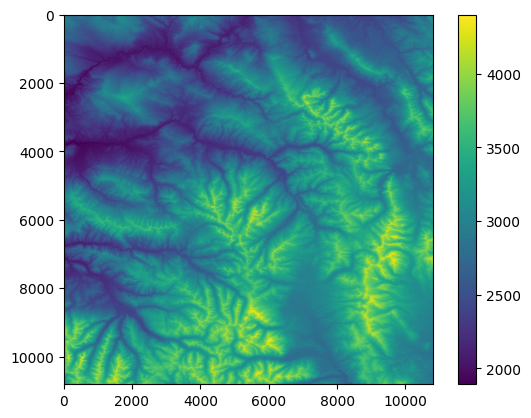

In [6]:
plt.imshow(shasta_dem, interpolation='none')
plt.colorbar()
plt.show()

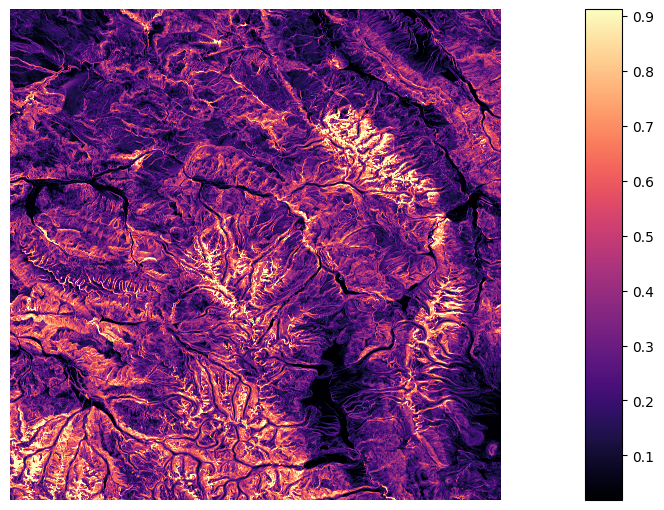

In [7]:
slope = rd.TerrainAttribute(shasta_dem, attrib='slope_riserun', zscale=0.00001)
rd.rdShow(slope, axes=False, cmap='magma', figsize=(8, 5.5))
plt.show()

In [8]:
slope.max()

rdarray(7.7689033, dtype=float32)

In [9]:
cost = 0.6*np.exp(3.5*np.abs(slope - 0.05))
print(cost.max(), cost.min(), cost.shape)

324429900000.0 0.6 (10812, 10812)


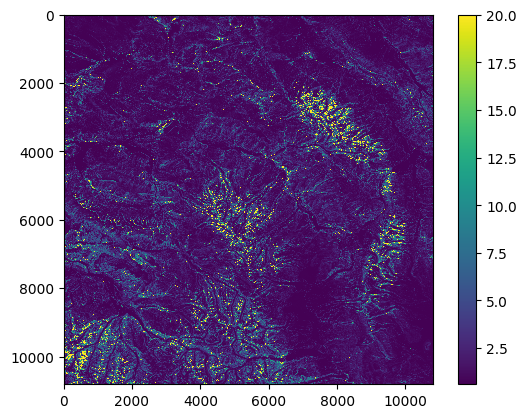

In [10]:
plt.imshow(np.minimum(cost,20), interpolation='none')
plt.colorbar()
plt.show()

In [11]:
cost.max()

rdarray(3.244299e+11, dtype=float32)

In [12]:
slope/1000

rdarray([[7.3113246e-05, 1.0379595e-04, 8.0834303e-05, ...,
          1.2914120e-04, 1.2152799e-04, 8.8944318e-05],
         [1.3108688e-04, 1.6005240e-04, 1.2877821e-04, ...,
          2.3805806e-04, 2.2041942e-04, 1.3163699e-04],
         [7.9695688e-05, 1.1844664e-04, 1.0728240e-04, ...,
          2.4365097e-04, 2.4298036e-04, 1.5108014e-04],
         ...,
         [3.0503853e-04, 5.9950934e-04, 5.9579912e-04, ...,
          8.6376858e-05, 8.4625339e-05, 4.7348534e-05],
         [2.7180390e-04, 5.9575791e-04, 6.3569460e-04, ...,
          1.0906996e-04, 9.8731711e-05, 6.1431718e-05],
         [1.9206261e-04, 4.2199221e-04, 4.7013938e-04, ...,
          8.0828162e-05, 6.9573834e-05, 2.7473441e-05]], dtype=float32)